# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
Loan = pd.read_csv("/content/drive/MyDrive/Machine Learning/Project Loan/Loan_Modelling.csv")
data = Loan.copy()

## Data Overview

In [5]:
#Print first 5 rows
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
#Print last 5 rows
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [7]:
data.shape

(5000, 14)

Data has 5000 rows and 14 columns

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


All rows have Non NULL values.

CCAvg is a float data type and all other columns contain integer values


####Get the Statistical Summary of the Data


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Observations



Average Age oc Customer is 45. The age range from 23 to 67.

Average Expereience of customers is 20. There are negative values for Experience starting -3 and Maximum Experience value is 43

Mininum Income of Customer is 8 thousand and Maximum of 224 thousand dollars. 50% of customers are under income range of 64 thousand and 75 % under 98 which shows Income is highly right skewed with outliers.

Family size ranges from 1 to 4 with average family size of 2.

Credit Card Average spending of Custoemrs range from 0 to 10 thousand dollars.

75% of custiomers spend less than 2.5 thousand of dollars monthly. This shows data is right skewed.

Mortgage value ranges from 0 to 635 thousand dollars. 75% of customers have mortgages below 101 thousand dollars showing the data has outliers and highly righ skewed.

Education, ZIPCode, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard variables should be treated as Categorical variables and not numerical variables.

### Sanity Checks

In [10]:
# Get the experience Data Count which are below 0
data[data["Experience"] < 0].shape[0]

52

In [11]:
# Print first 10 rows with Experience less than 0
data[data["Experience"] < 0].head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


There are 52 rows out of 5000 which have negative experience value. It accounts to only 10% of the data. Options we can have



1.   Drop the rows with negative experience
2.   Treat the values - may be make this value 0
3.   Find the relation of Experience with Other variable and try to impute with mean or average





In [12]:
# Group data with experience negative values and find average age associated with it
data[data["Experience"] < 0].groupby("Experience")["Age"].mean()

Experience
-3    23.500000
-2    24.066667
-1    24.848485
Name: Age, dtype: float64

In [13]:
# Group data for all experience and find average age associated with it
data.groupby("Experience")["Age"].mean()

Experience
-3     23.500000
-2     24.066667
-1     24.848485
 0     25.636364
 1     26.513514
 2     27.305882
 3     28.364341
 4     29.300885
 5     30.363014
 6     31.369748
 7     32.148760
 8     33.361345
 9     34.285714
 10    35.025424
 11    36.112069
 12    37.205882
 13    38.196581
 14    39.181102
 15    40.193277
 16    40.952756
 17    41.944000
 18    42.978102
 19    43.948148
 20    45.114865
 21    45.955752
 22    47.266129
 23    48.548611
 24    49.725191
 25    50.612676
 26    51.611940
 27    52.440000
 28    53.347826
 29    54.282258
 30    55.166667
 31    56.365385
 32    57.246753
 33    58.324786
 34    59.224000
 35    59.944056
 36    61.131579
 37    62.146552
 38    62.806818
 39    63.976471
 40    64.614035
 41    65.627907
 42    66.500000
 43    67.000000
Name: Age, dtype: float64

Since the average age for 0 experience is 25 and negative experience's Age average is below that, it will be good to reset expeeinece value to 0 rather than giving a postive number to go with what other data implies

In [14]:
# Replace negative experience value with 0
data["Experience"] = data["Experience"].apply(lambda x: 0 if x < 0 else x)

In [15]:
#Print all unique experience values
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22,  0, 34, 38, 40, 33,  4, 42, 43])

Now Lets check the ZIPCode Column

In [16]:
#Print number of unique Zipcode values
data["ZIPCode"].nunique()

467

Removing the ZIPCode data since it is 467 in number for 5000 rows and including it can cause overfitting. We need more information like population or demography for zipcodes which could have given more insights. The data given here doesnt contain any such information.

In [17]:
# Drop ZipCode to avoid overfitting
data.drop("ZIPCode", axis=1, inplace=True)

Now Lets drop the ID column since it doesnt any value to the data

In [18]:
#Drop column ID
data.drop("ID", axis=1, inplace=True)

Converting the columns to Categorical Variable

In [19]:
# Get all categorical Variable columns
categorical_columns = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
]

In [20]:
# Convert Variable type to Category
data[categorical_columns] = data[categorical_columns].astype("category")

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   int64   
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   category
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(5)
memory usage: 264.5 KB


We see that the Variable Type is now category.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [22]:
# Function to Print histogram and boxplot
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [23]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Age

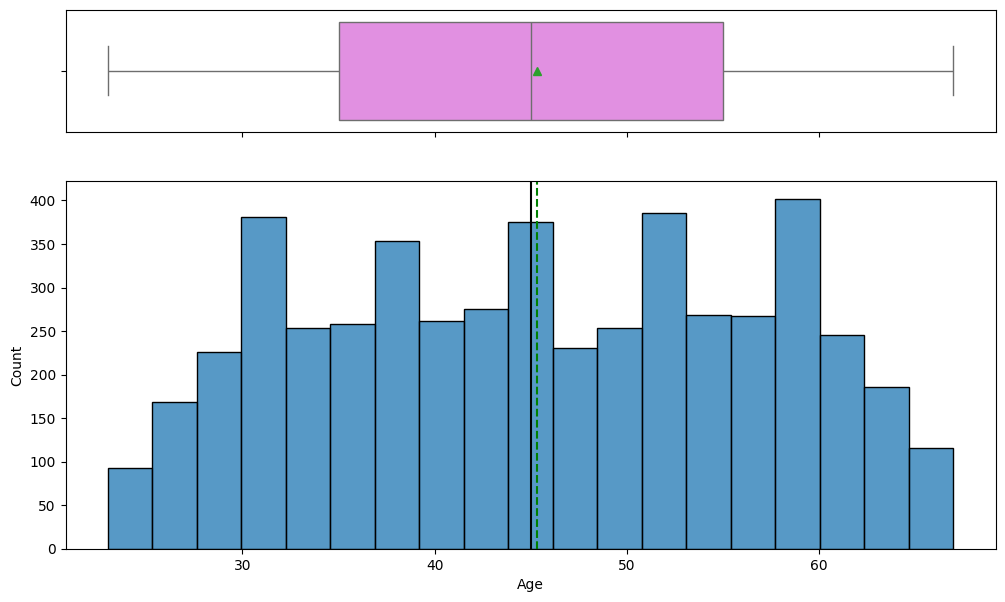

In [24]:
histogram_boxplot(data, "Age")



*   The minimum age is 23 and maximum 67
*   Data is normally distributed with mean and Median value very near



### Experience

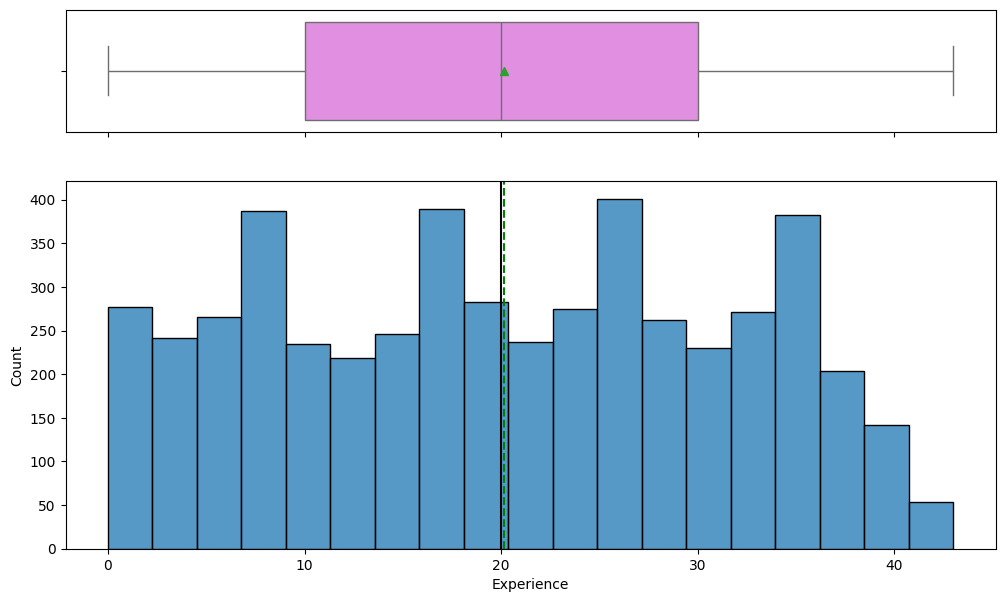

In [25]:
histogram_boxplot(data, "Experience")

Experience value range from 0 to  43.

Data is normally distributed

### Income

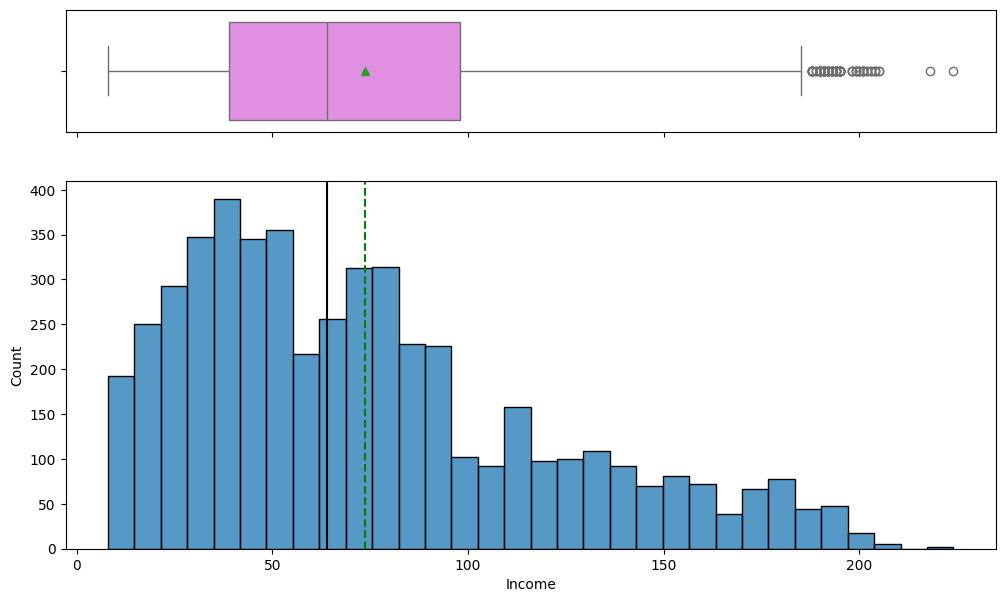

In [26]:
histogram_boxplot(data, "Income")

Income data is right skewed.

50% of data is below 65.

There are many outliers

### CCAvg

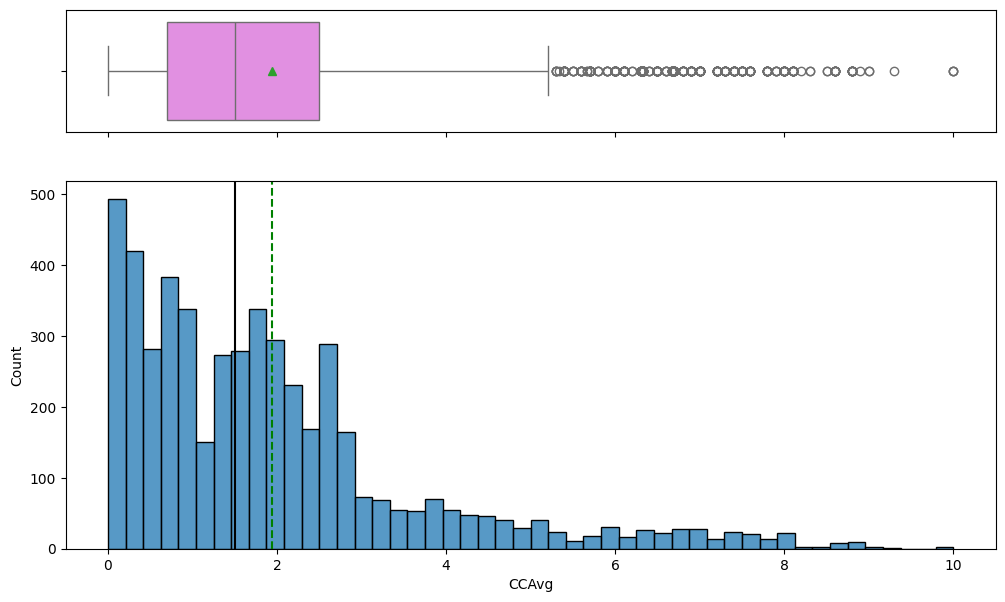

In [27]:
histogram_boxplot(data, "CCAvg")

Data for Credit CARD Monthly average spending is right Skewed with many Outliers

### Mortgage

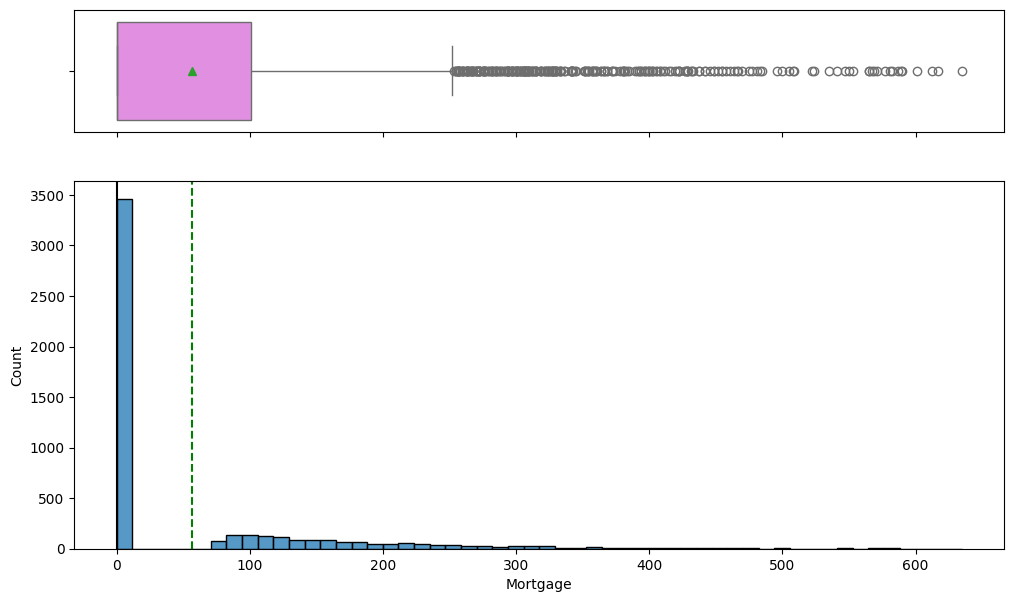

In [28]:
histogram_boxplot(data, "Mortgage")

Majority Customers doenst have mortgage with Median at 0.

Data is right skewed and many outliers

### Family

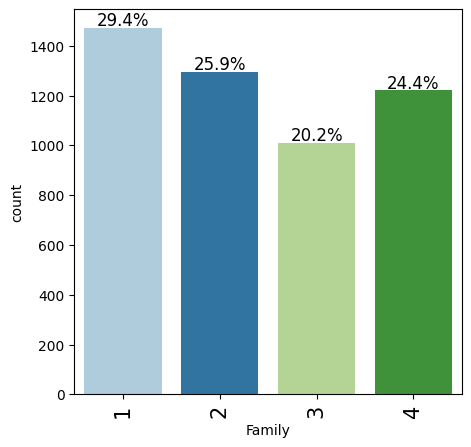

In [29]:
labeled_barplot(data, "Family", perc=True)

29.4% of customers have Family of 1

25.9 % have family of 2

20.2% have family of 3

24.4% have family of 4

### Education

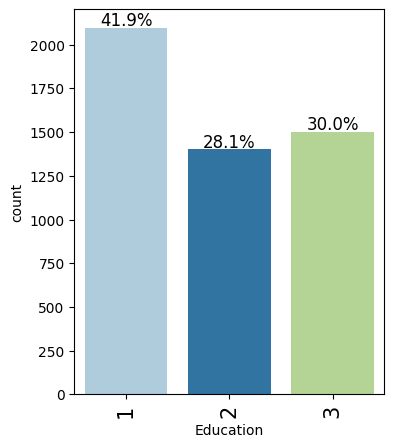

In [30]:
labeled_barplot(data, "Education", perc=True)

41.9% of customers are 1: Undergrad

28.1% of customers are 2: Graduate

30.0% of customers are 3: Advanced/Professional

### Securities_Account

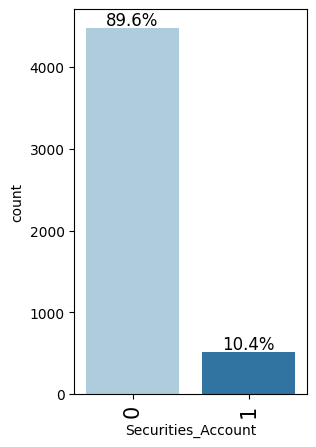

In [31]:
labeled_barplot(data, "Securities_Account", perc=True)

89.6 % of customers doent have Securities Account

### CD_Account

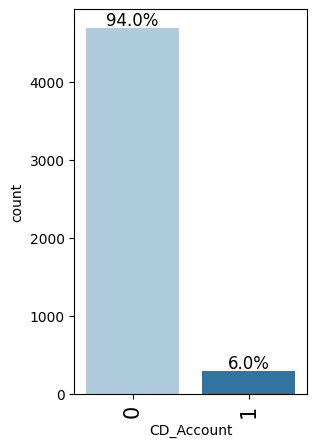

In [32]:
labeled_barplot(data, "CD_Account", perc=True)

94% of Customers doenst have CD_Account - certificate of deposit

### Online

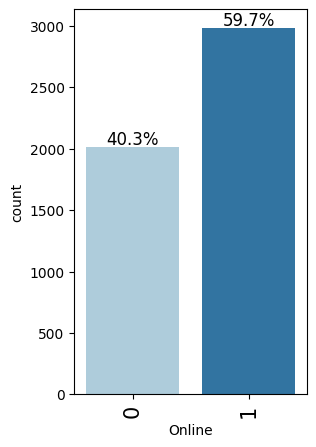

In [33]:
labeled_barplot(data, "Online", perc=True)

40.3 % of customers dont have Online banking facility

59.7 % of customers have online banking facility

### Credit Card

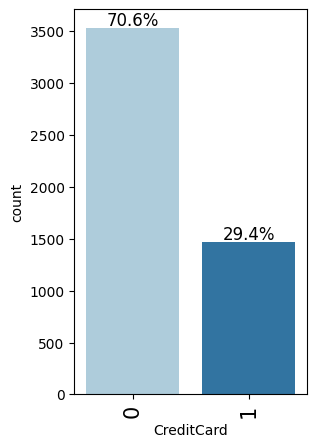

In [34]:
labeled_barplot(data, "CreditCard", perc=True)

70.6% of customers doesnt have Credit Card issued by other banks

29.4 % customers have credit card issued from other banks


## Bi Variant Ananlysis

### Heat Map to find the Data correlation

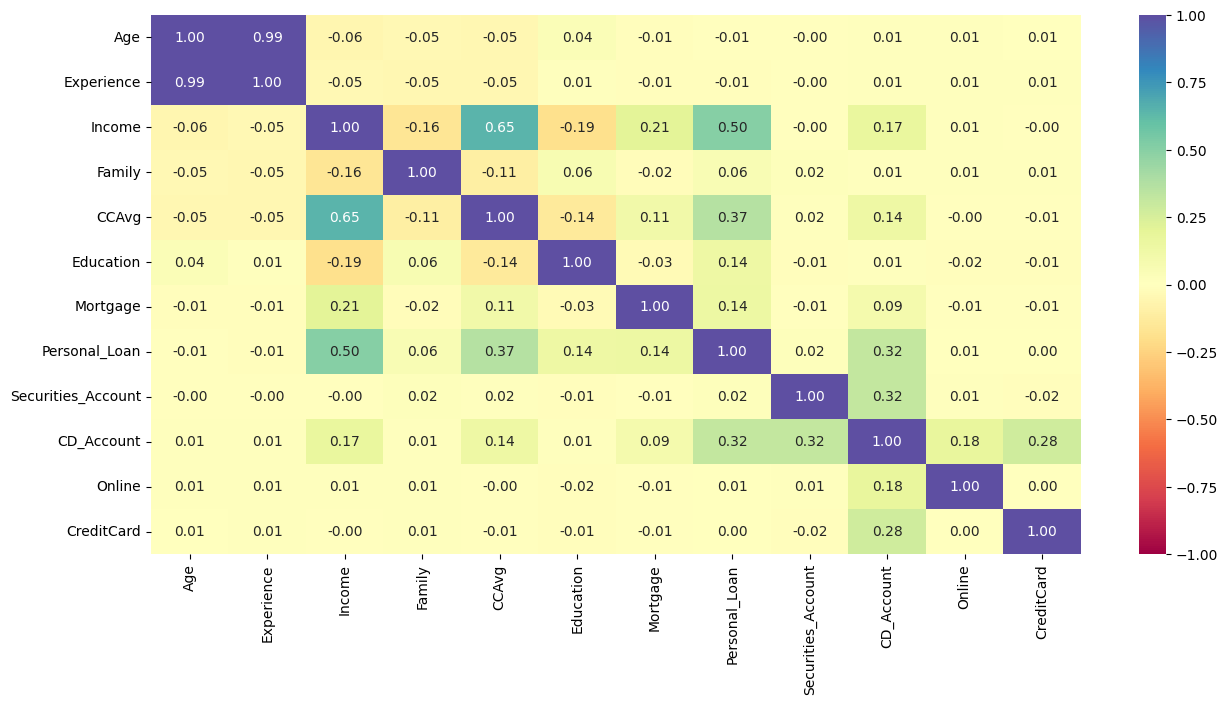

In [35]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Personal Loan have Positive Correlation with Income, CCAvg, CD_Account

Experience and Age have very high correlation of 0.99

Income and CCAvg have a good positive correlation of 0.65

In [36]:
#Define function to plot with Percentage

def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

In [37]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Personal Loan vs Education

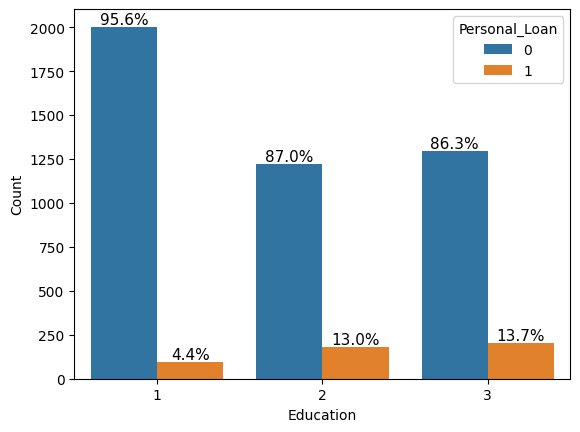

<Figure size 1200x800 with 0 Axes>

In [38]:

ax3 = sns.countplot(x="Education", hue="Personal_Loan", data=data)
ax3.set(xlabel='Education', ylabel='Count')
percentage_above_bar_relative_to_xgroup(ax3)
plt.figure(figsize=(12, 8))
plt.show()

Higher Educated People have taken more Personal loans.

### Personal Loan vs Family

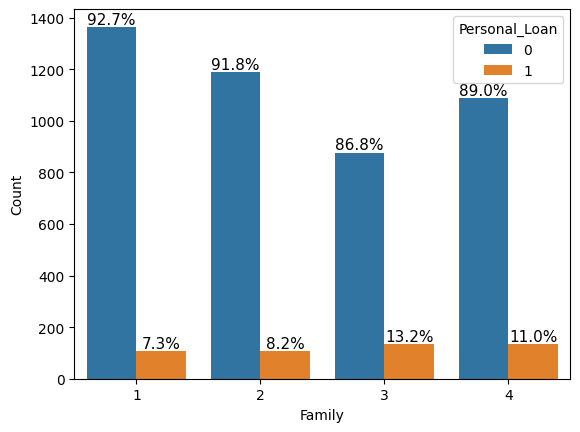

In [39]:
ax3 = sns.countplot(x="Family", hue="Personal_Loan", data=data)
ax3.set(xlabel='Family', ylabel='Count')
percentage_above_bar_relative_to_xgroup(ax3)
plt.show()

Customers with Family size 3 or 4 have taken more Personal Loan

### Personal Loav Vs Securities Account

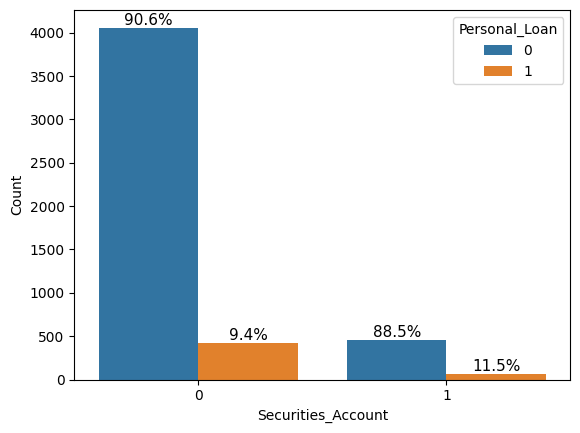

In [40]:
ax3 = sns.countplot(x="Securities_Account", hue="Personal_Loan", data=data)
ax3.set(xlabel='Securities_Account', ylabel='Count')
percentage_above_bar_relative_to_xgroup(ax3)
plt.show()

Most of the Customers does'nt have Securities Account.

More Personal Loan is taken by customers who doenst have Securities Account

### Personal Account Vs CD_Account

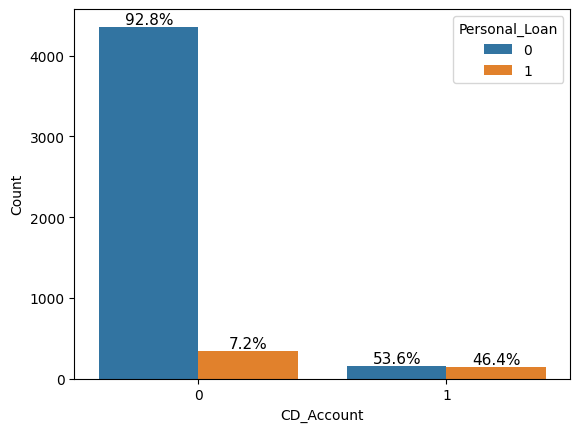

In [41]:
ax3 = sns.countplot(x="CD_Account", hue="Personal_Loan", data=data)
ax3.set(xlabel='CD_Account', ylabel='Count')
percentage_above_bar_relative_to_xgroup(ax3)
plt.show()

Most of the Customers does'nt have CD Account.

More Personal Loan is taken by customers who doenst have CD Account

### Personal Loan Vs Online

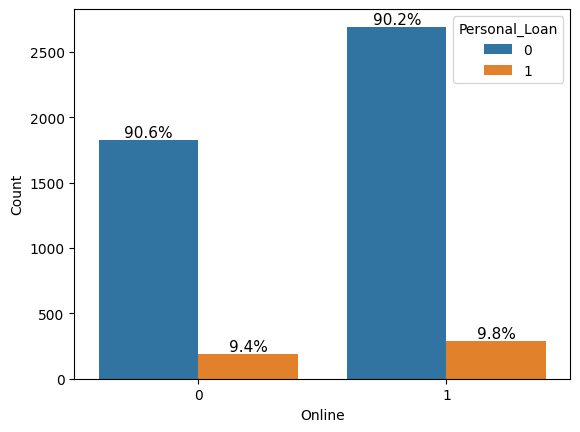

In [42]:
ax3 = sns.countplot(x="Online", hue="Personal_Loan", data=data)
ax3.set(xlabel='Online', ylabel='Count')
percentage_above_bar_relative_to_xgroup(ax3)
plt.show()

Personal Loan is almost  equally (9% )taken by same customers who have / have not Online Banking Facility

### Personal Loan Vs Credit Card

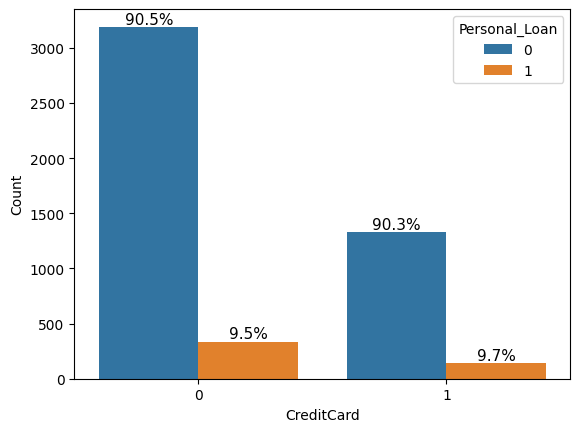

In [43]:
ax3 = sns.countplot(x="CreditCard", hue="Personal_Loan", data=data)
ax3.set(xlabel='CreditCard', ylabel='Count')
percentage_above_bar_relative_to_xgroup(ax3)
plt.show()

Most of the Customers doesnt have Credit Card issued from other banks.

Personal Loan is almost  equally (9% )taken by same customers who have / have not Credit Card issued from Other banks

### Personal Loav Vs Age

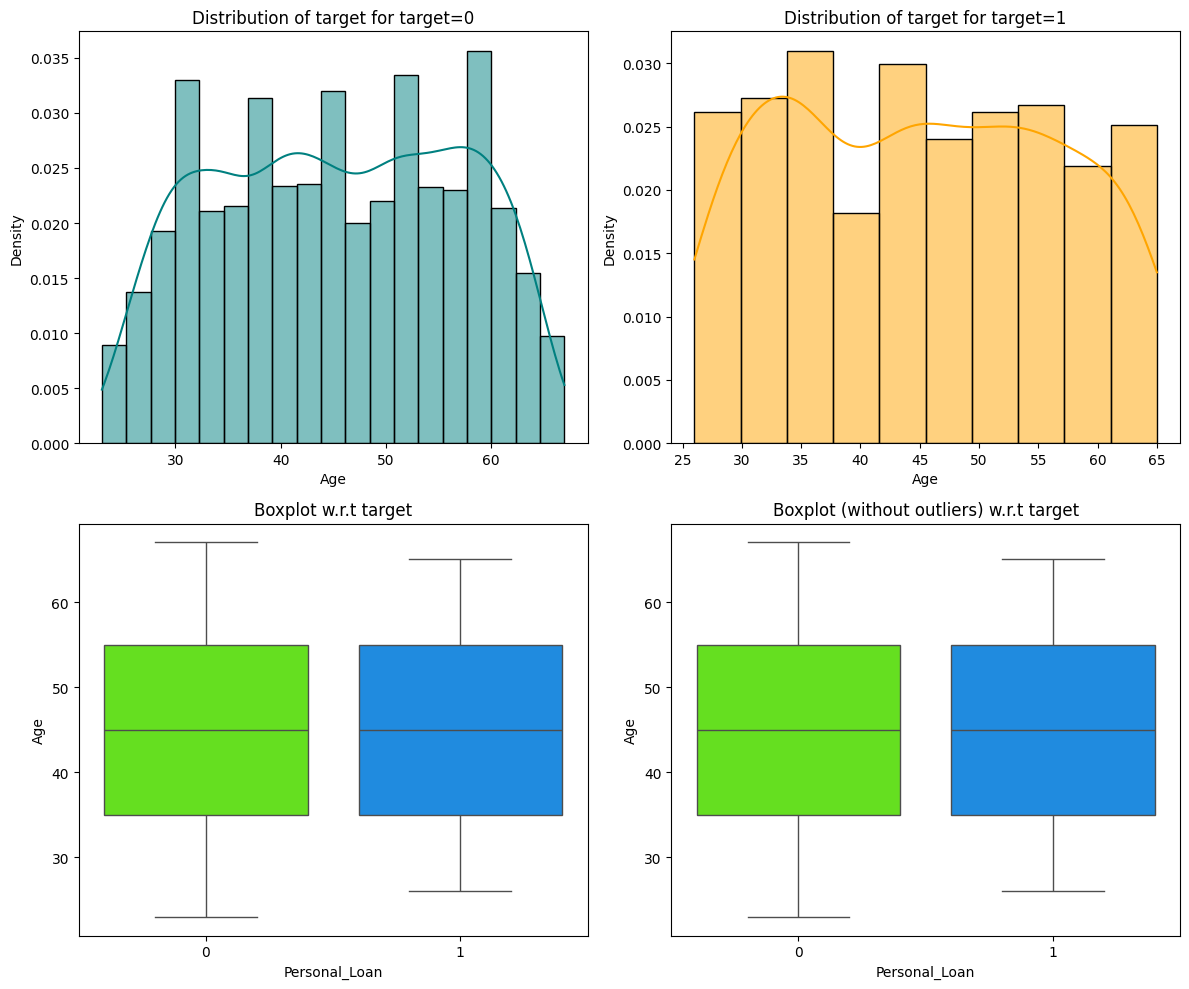

In [44]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

Customers in 30s seem to have taken more Personal Loan

### Personal Loan Vs Experience

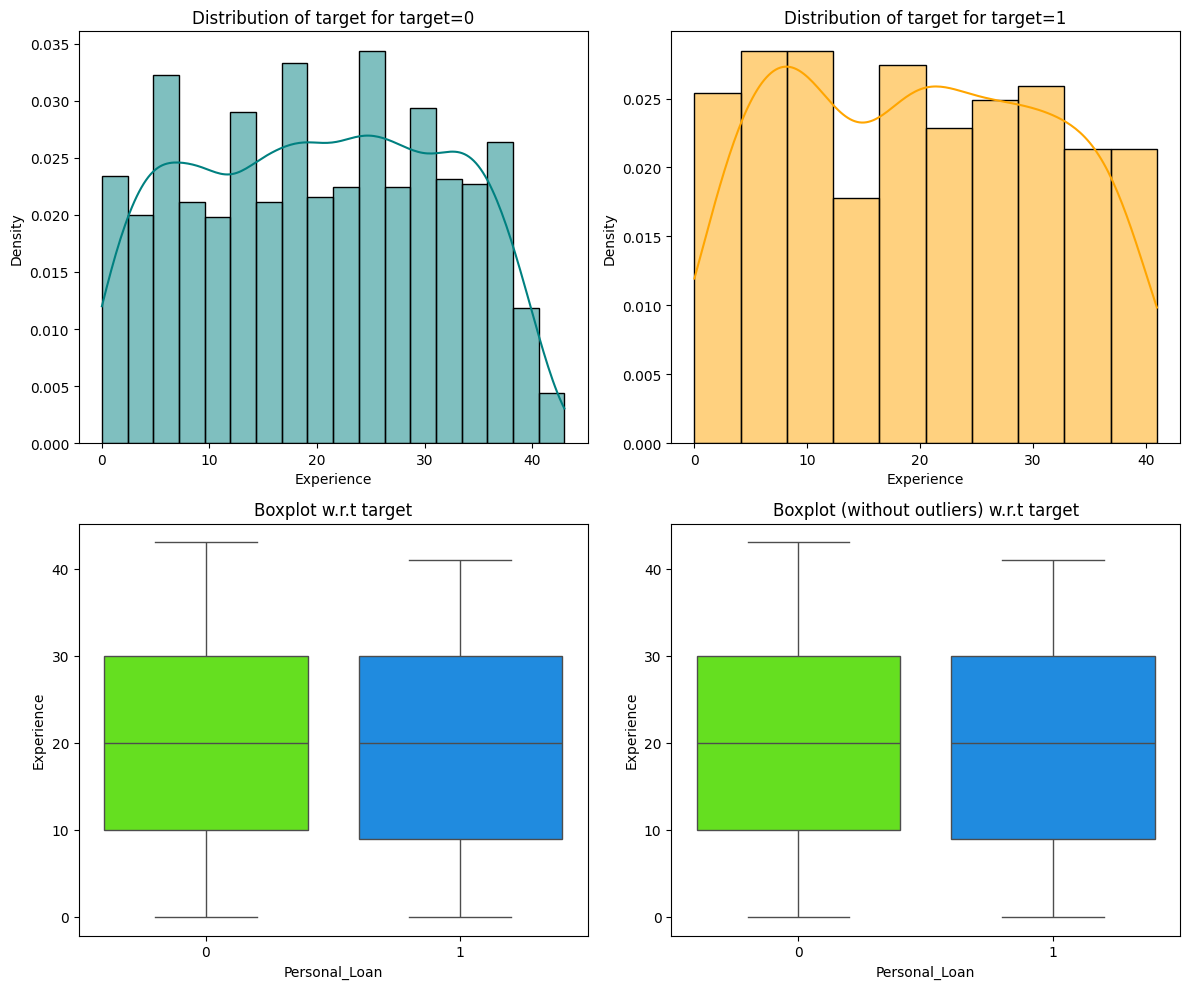

In [45]:
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")

Customers between 5-15 years of experience have taken more loans.

### Personal Loav Vs Income

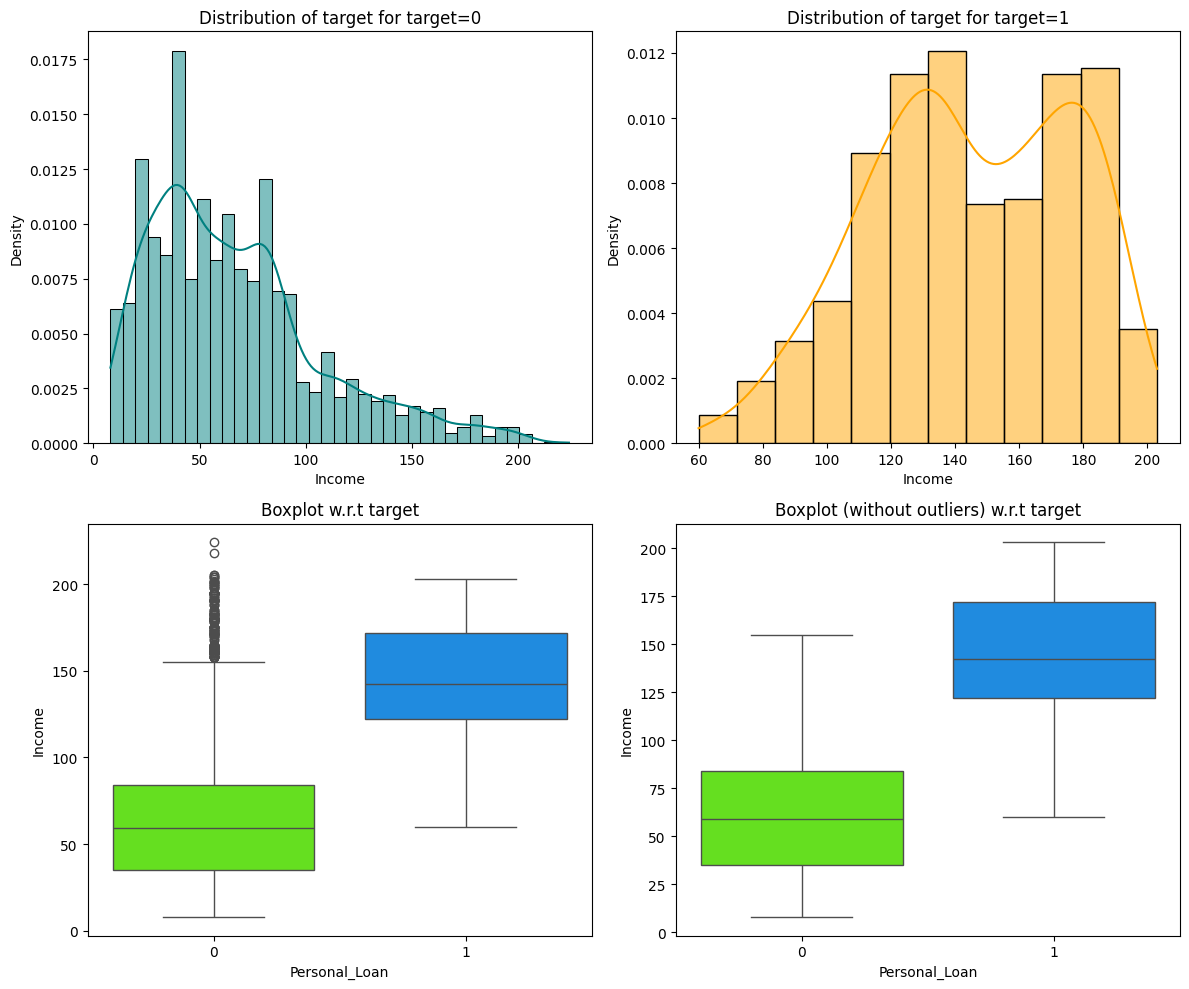

In [46]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

Higher Income Customers are more likely to take Personal Loan

### Personal Loan Vs Mortgage

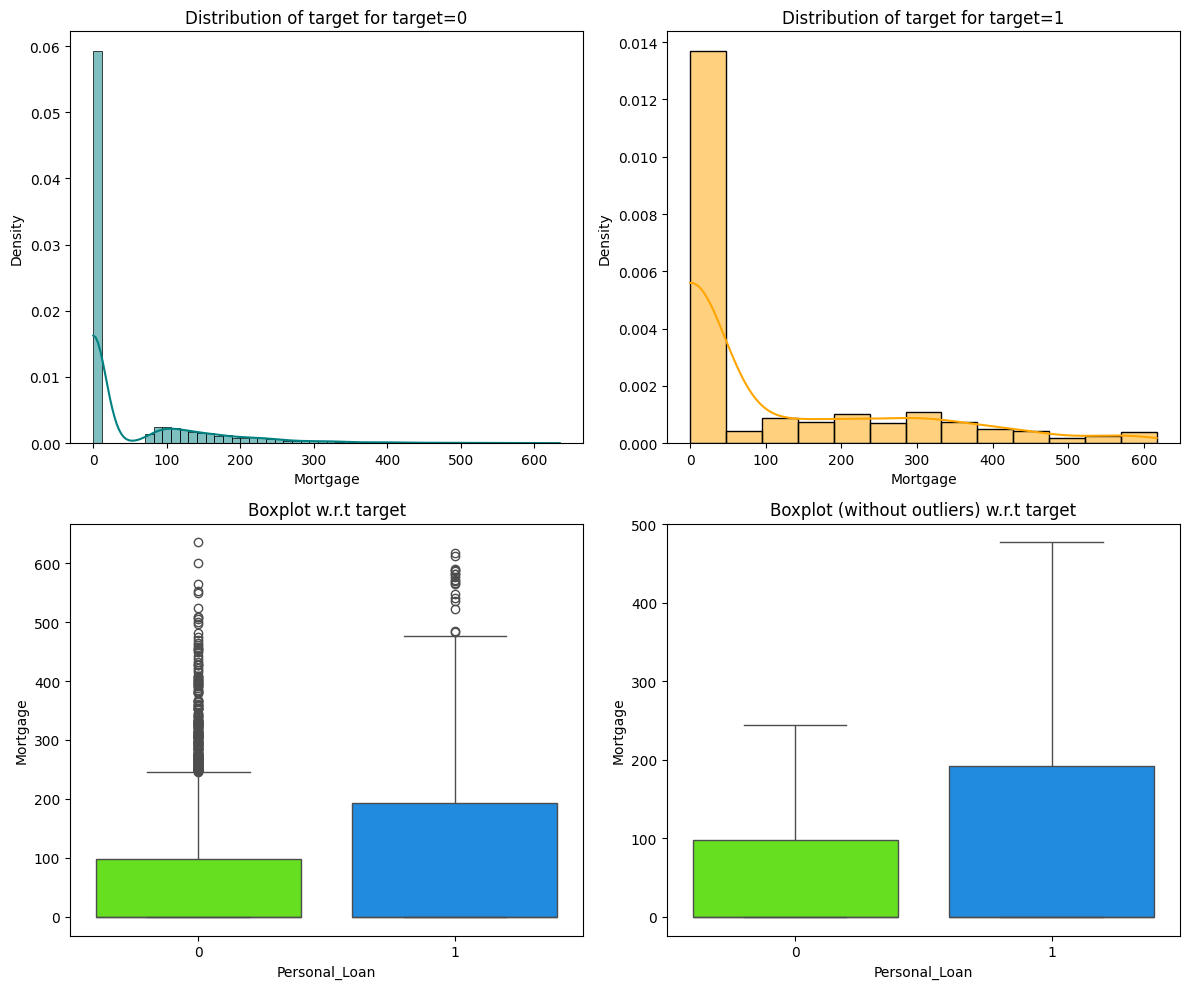

In [47]:
distribution_plot_wrt_target(data, "Mortgage", "Personal_Loan")

Customers with higher Mortgage seems to have more probablity of taking Personal Loan

Distribution is highly right skewed with 50% of customers without any Mortgage

### Personal Loan Vs CCAvg

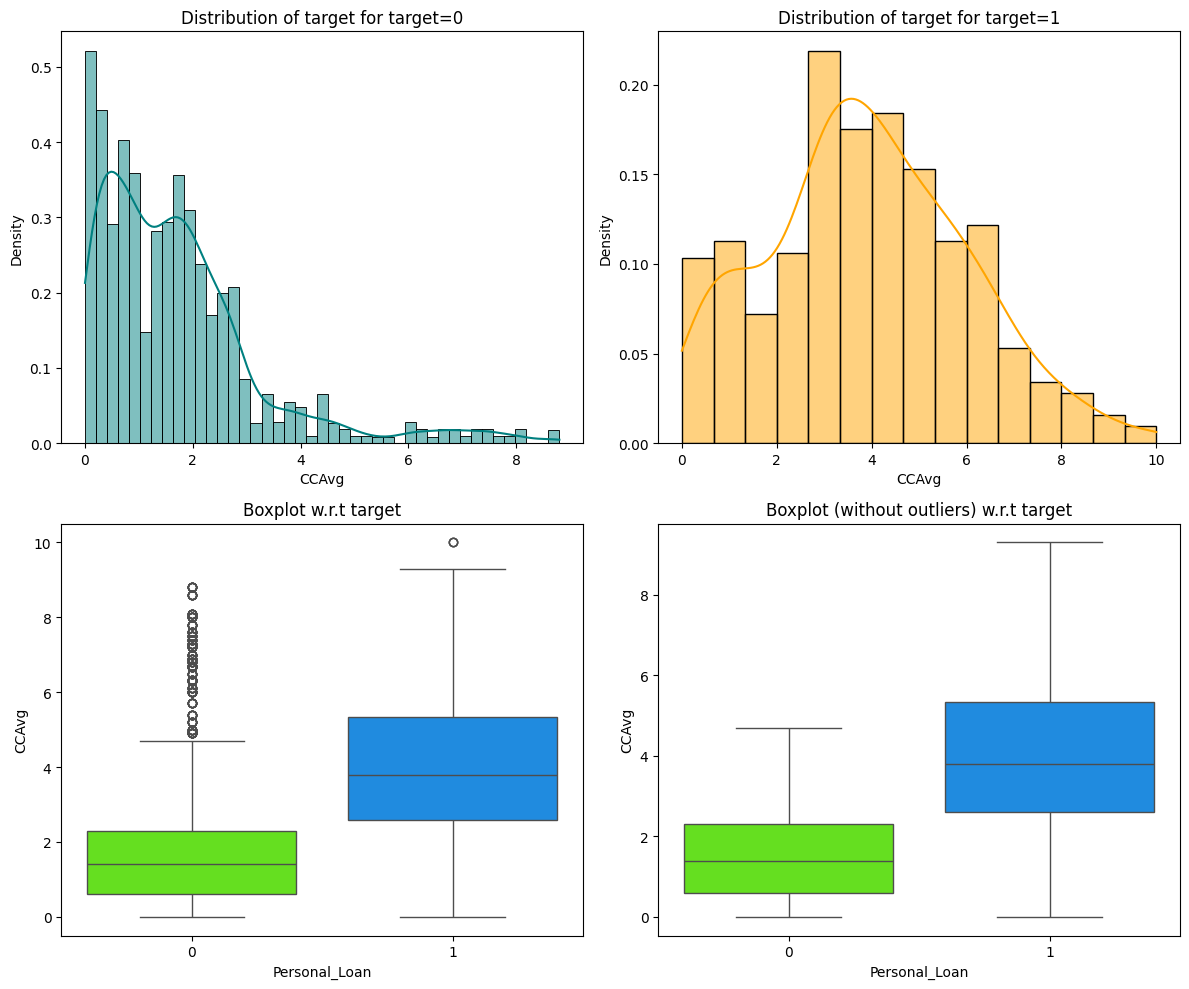

In [48]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

Customers who spend high on Credit Cards are more likely to take Personal Loan

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)



*   There are NO Missing values in the data
*   We see Age and Experience have high Correlation (0.99). We can remove one of the variable, Experience.


*   Scaling is not required for Decision Tree
*   Outliers are observed for Variables Income, Mortgage, CCAvg. But these are real world scenario where there will be wide range of income differeneces and we would try to include this values in the data for better real world predictions.

Also Decision Trees are not sesitive to outliers-

Reference - https://www.sciencedirect.com/topics/mathematics/decision-tree

"Another feature that saves data preparation time: missing values in training data will not impede partitioning the data for building trees. Decision trees are also not sensitive to outliers since the partitioning happens based on the proportion of samples within the split ranges and not on absolute values."




In [49]:
# Apply One Hot Encoding to ZIPode and Education Category Variable. Other categories have just 0 or 1 which is the way we want the category data
data = pd.get_dummies(data, columns=[ "Education"], drop_first=True)

In [50]:
#Drop Experience since it has strong correlation with Age
data = data.drop(["Experience"], axis=1)

In [51]:
data.head()

,Age,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_2,Education_3
0,25,49,4,1.6,0,0,1,0,0,0,False,False
1,45,34,3,1.5,0,0,1,0,0,0,False,False
2,39,11,1,1.0,0,0,0,0,0,0,False,False
3,35,100,1,2.7,0,0,0,0,0,0,True,False
4,35,45,4,1.0,0,0,0,0,0,1,True,False


In [52]:
# Splitting data in train and test sets
X = data.drop(["Personal_Loan"], axis=1)
Y = data["Personal_Loan"]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [53]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


In [54]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

### Model performance evaluation

### Model can make wrong predictions as:

1. Predicting a customer will not accept a Personal Loan but customer could have taken loan if offered - False Negative

2. Predicting a customer will accept Loan but in Reality Customer wont accept the Loan - False Positive


### Which case is more important?

* If we predict a accepting customer as a non-accepting customer bank would lose an opportunity of providing loan to a potential customer.

### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The make_confusion_matrix function will be used to plot confusion matrix.

In [55]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [56]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building

In [57]:
#Build Decision Tree
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Checking model performance on training set

In [58]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


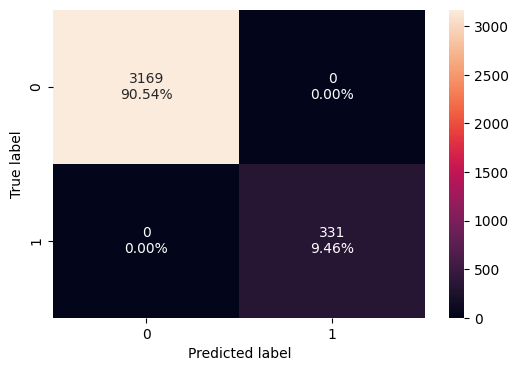

In [59]:
confusion_matrix_sklearn(model, X_train, y_train)

The Model has highest Metrics of 100% for the train data. The Model may be overfitted

### Checking model performance on test set

In [60]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.986667,0.912752,0.951049,0.931507


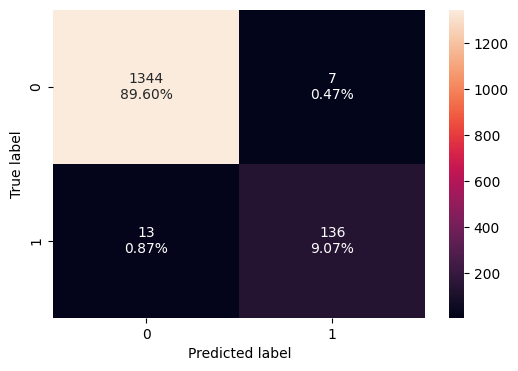

In [61]:
confusion_matrix_sklearn(model, X_test, y_test)

Model has good Performace on test data as well. Recall is 91.2% on the test data.

* Model is giving good and generalized results on training and test set.

### Visualizing the Decision Tree

In [62]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education_2', 'Education_3']


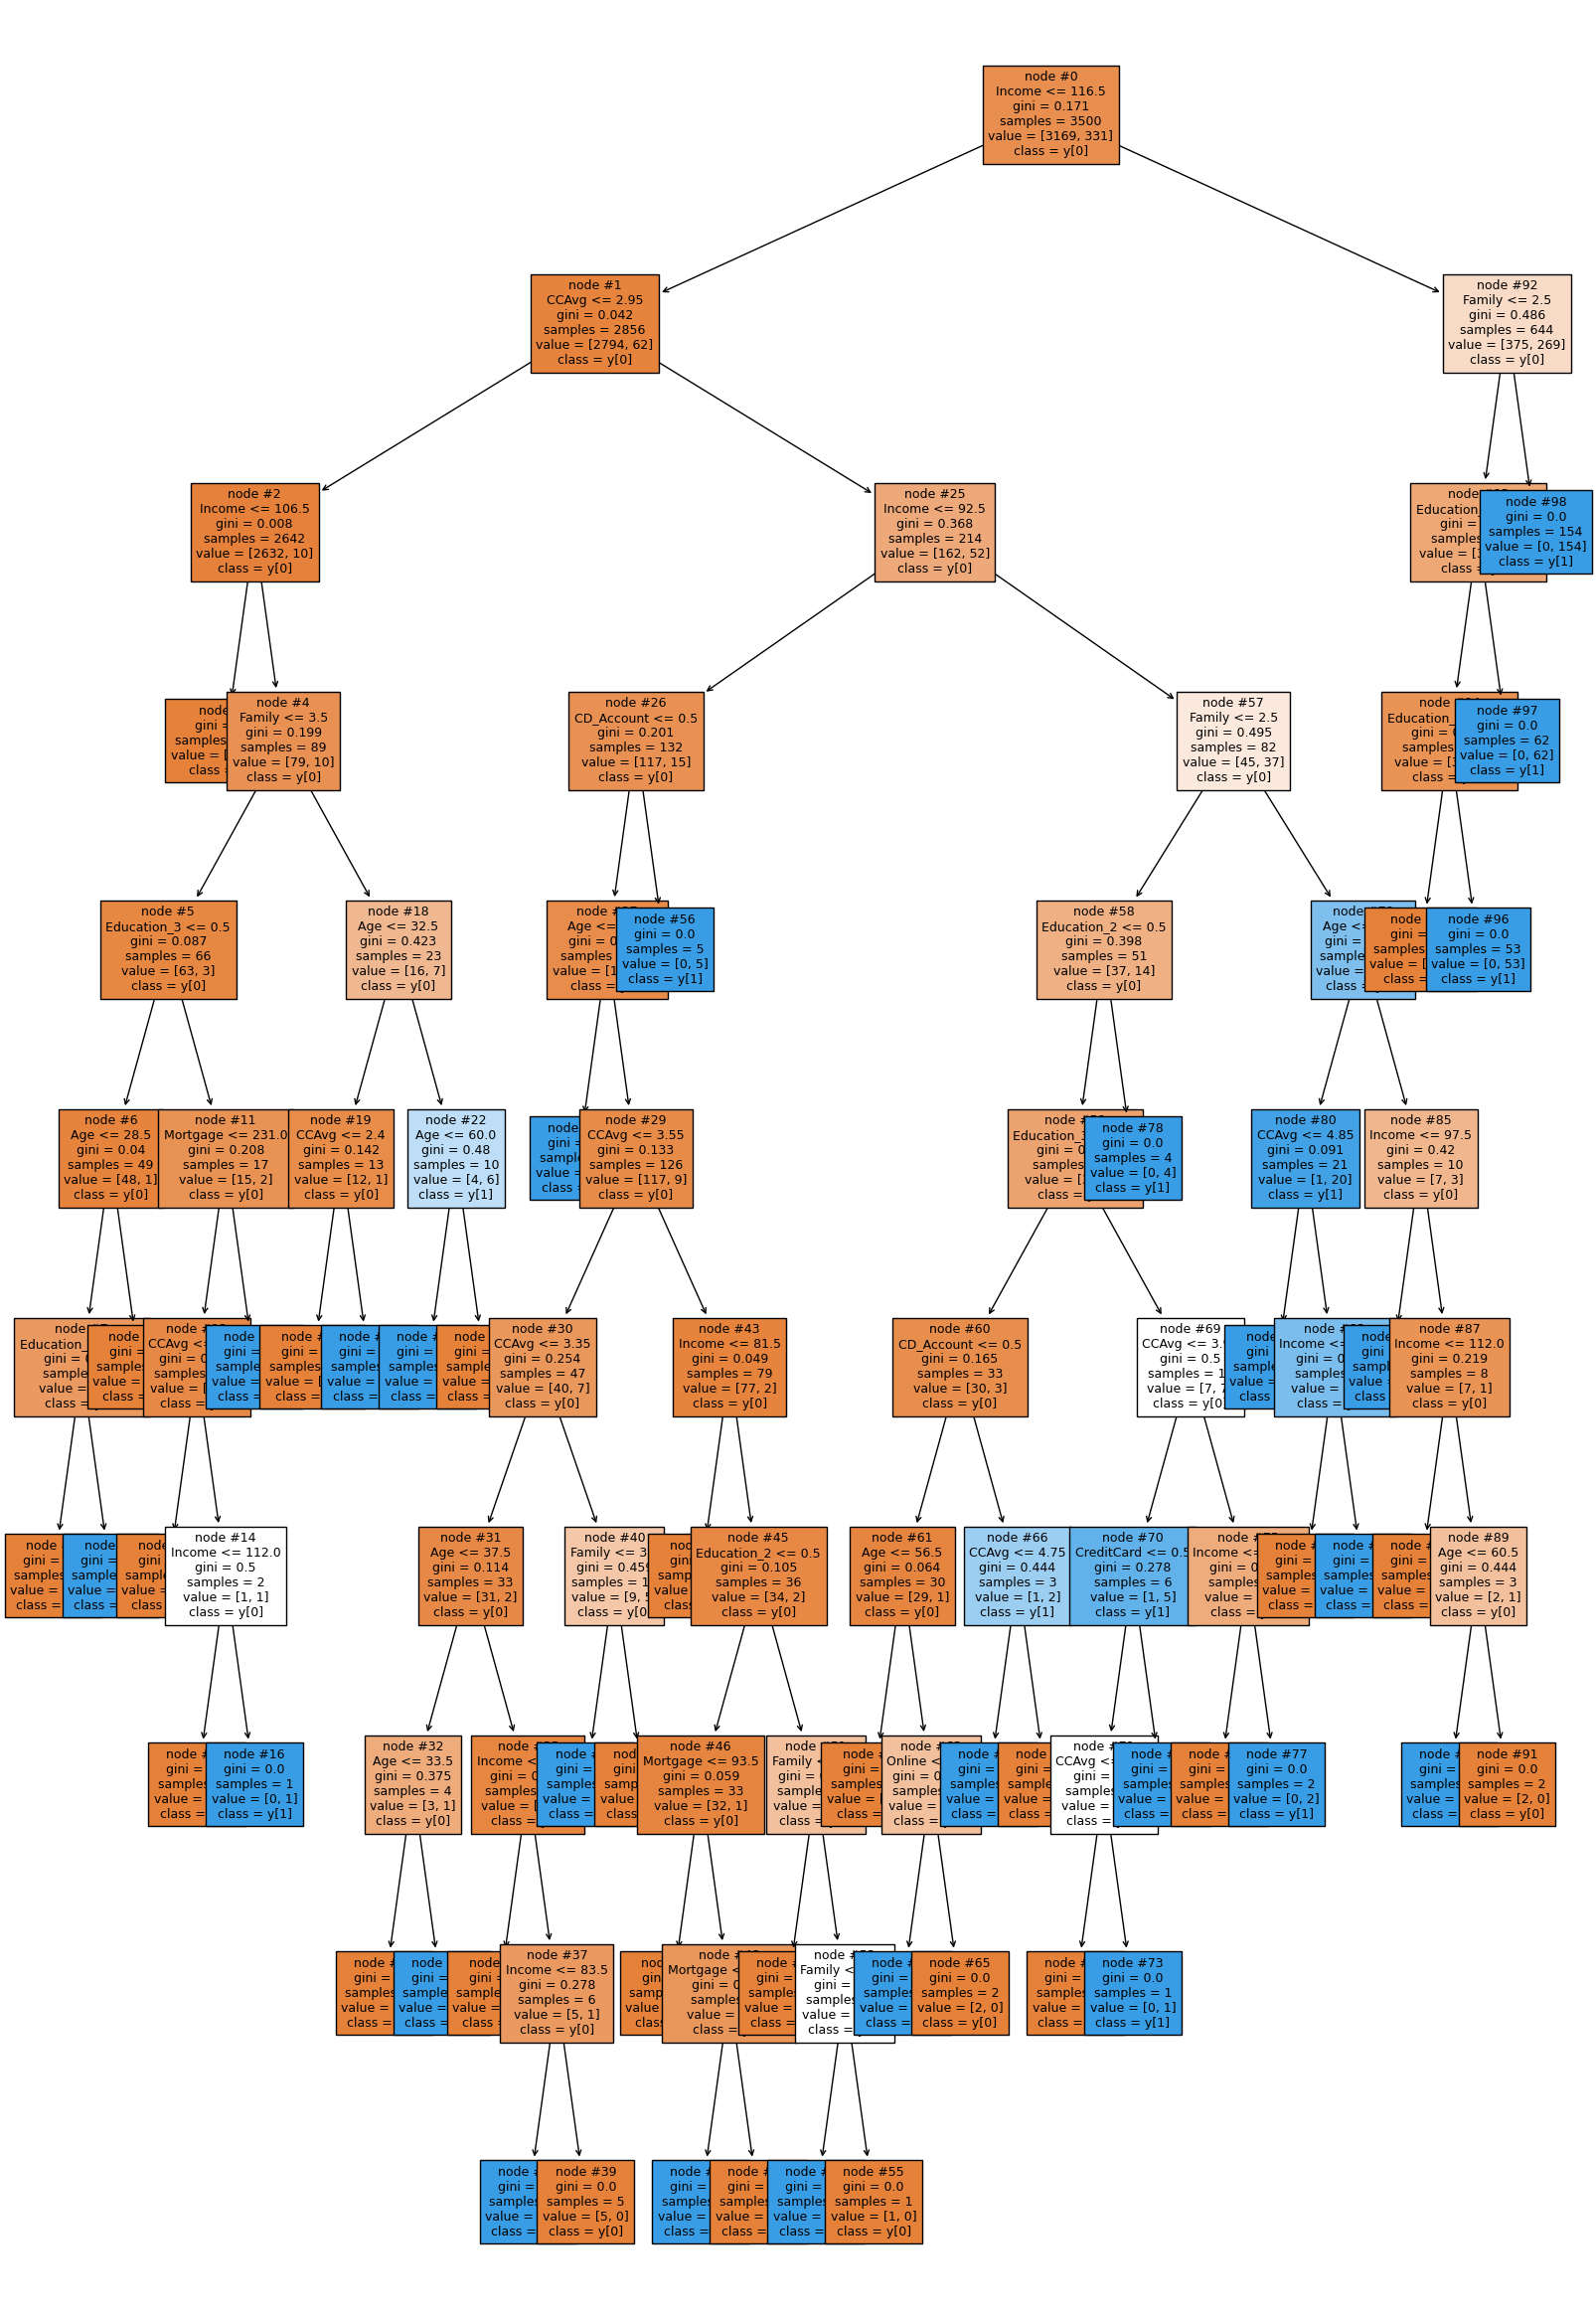

In [ ]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- weights: [43.00, 0.00] class: 0
|   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |--- Mortgage <= 231.00
|   |   |   |   |   |   |--- CCAvg <= 1.95
|   |   |   |   |   |   |   |--- weights: [14.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  1.95
|   |   |   |   |   |   |   |--- Income <= 112.00
|   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Income >  112.00
|   

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.315198
Family              0.259811
Education_2         0.166192
Education_3         0.144605
CCAvg               0.055184
Age                 0.032404
CD_Account          0.017273
Mortgage            0.005996
Online              0.002224
CreditCard          0.001112
Securities_Account  0.000000


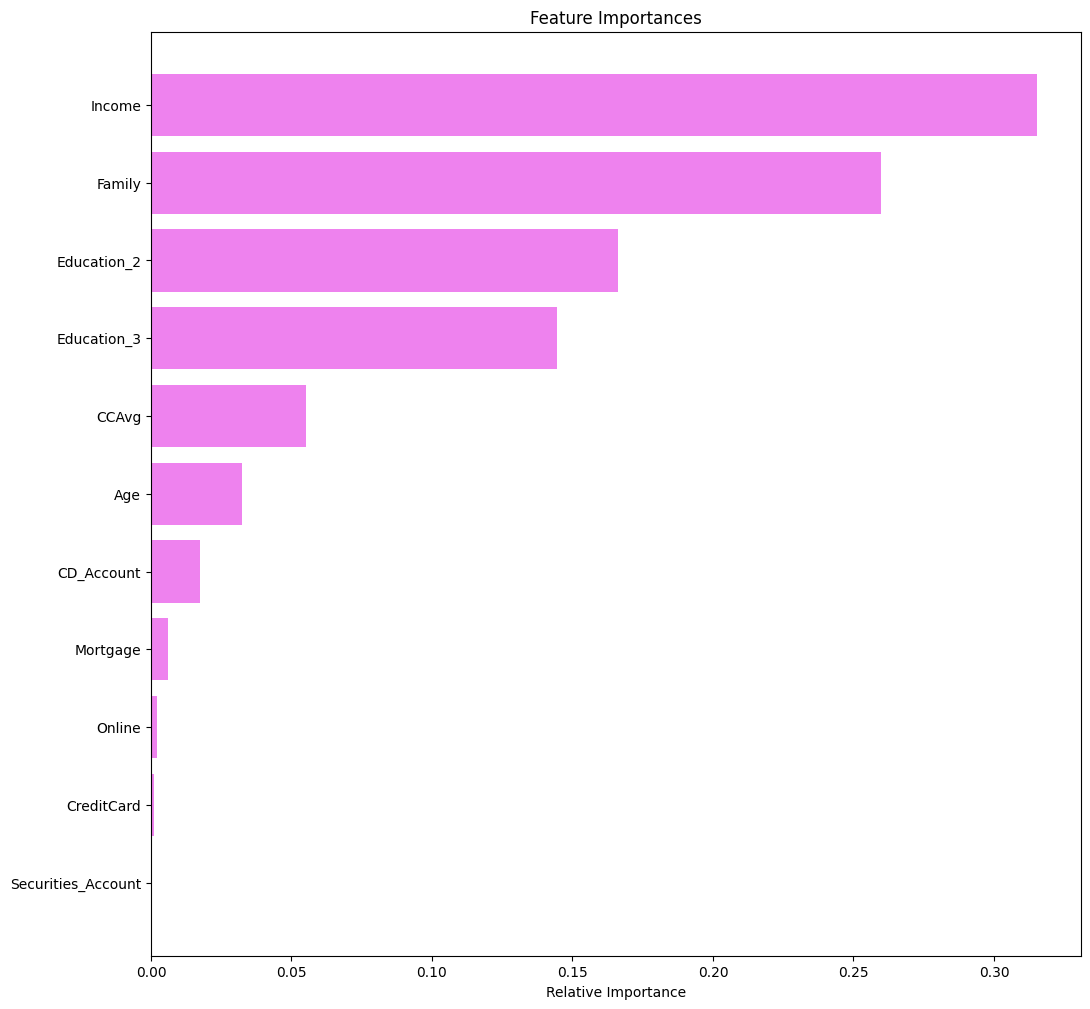

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Most Important Features are :

*   Income
*   Family


*   Education_2
*   Education_3





### Model Performance Improvement

### Decision Tree (Pre-pruning)

#### Using GridSearch for Hyperparameter tuning of our tree model
* Let's see if we can improve our model performance even more.

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": [5,10,15, None], # [2, 4, 6]
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],

}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, random_state=1)

### Checking performance on training set

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.960857,0.990937,0.709957,0.827238


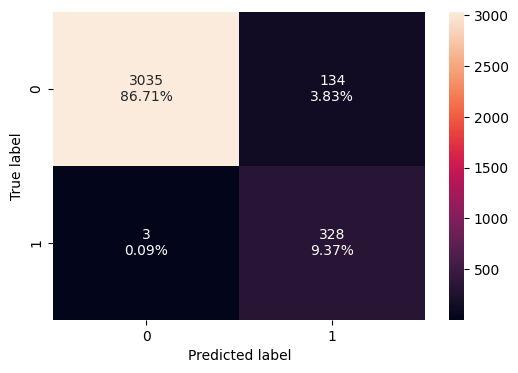

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

Pre Pruned Decision Tree gives 99% Recall on Train data

### Checking model performance on test set

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.957333,0.95302,0.713568,0.816092


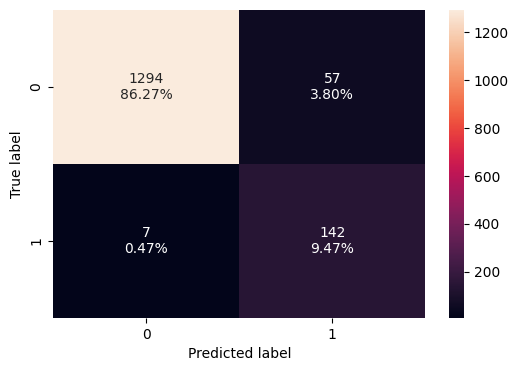

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

After Pre pruning with Hyper parameters Recall on test data is 95%

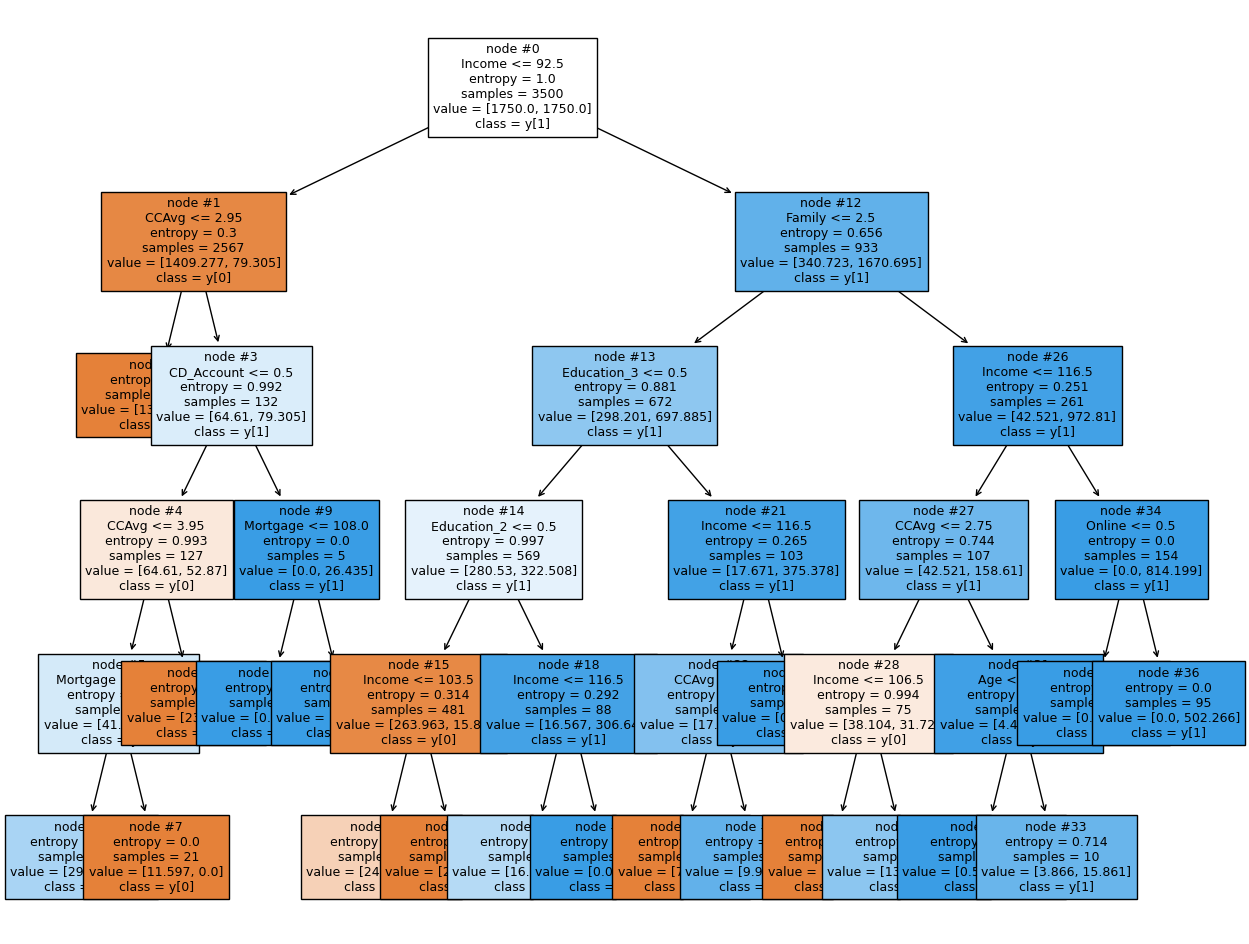

In [ ]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

* We are getting a simplified tree after pre-pruning.

### Cost Complexity Pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000186,0.001114
2,0.000238,0.001590
3,0.000250,0.002090
4,0.000268,0.002626
5,0.000268,0.003699
6,0.000272,0.004244
7,0.000275,0.005344
8,0.000276,0.005897
9,0.000381,0.006278


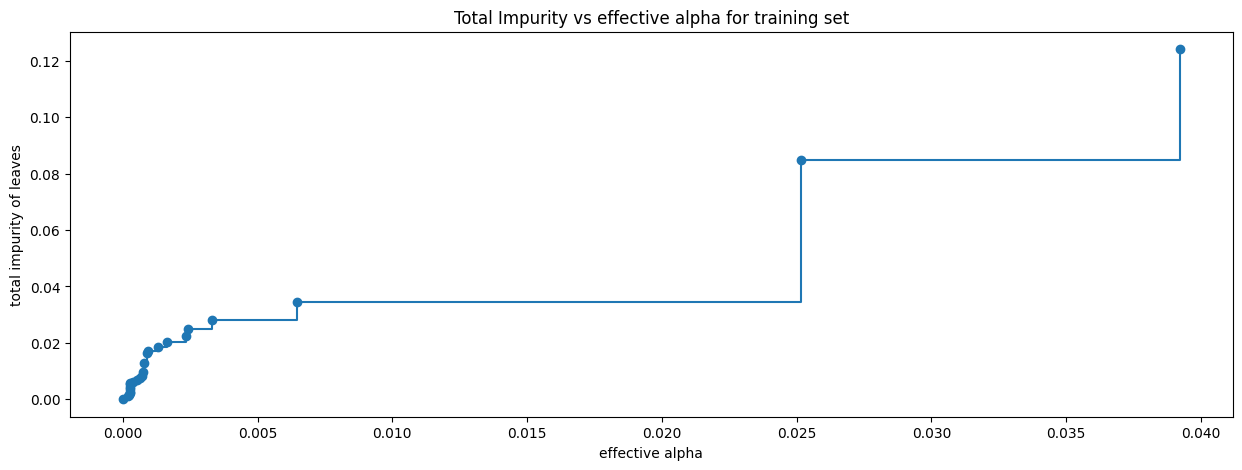

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


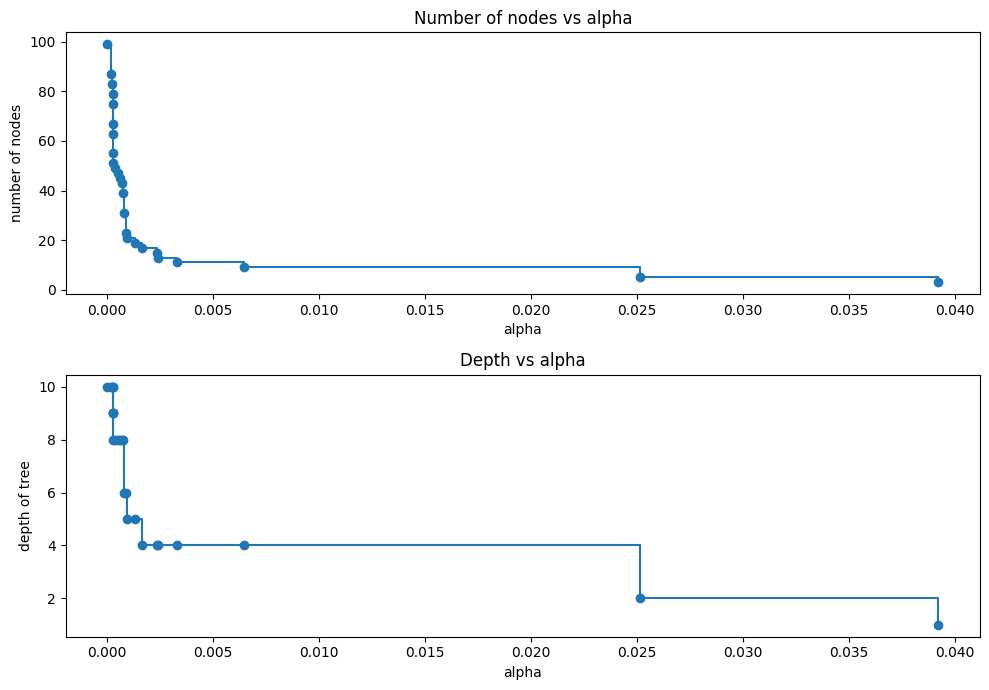

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Recall vs alpha for training and testing sets

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

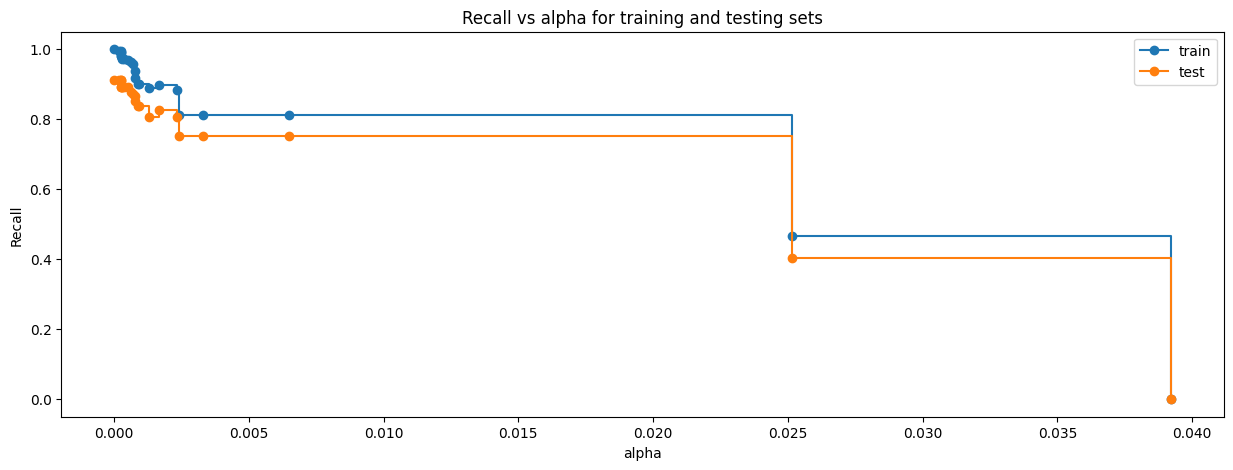

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


### Checking model performance on training set

In [ ]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


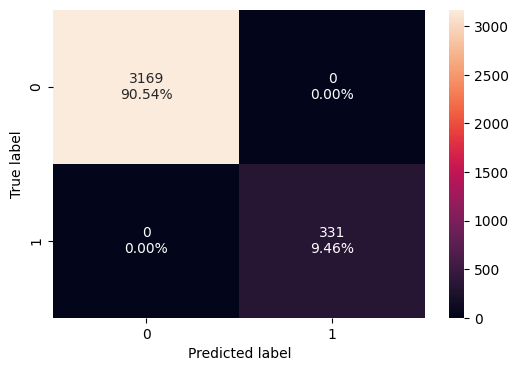

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

After Post pruning with ccp_alpha, Train data has 100% recall

### Checking model performance on test set

In [ ]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.986667,0.912752,0.951049,0.931507


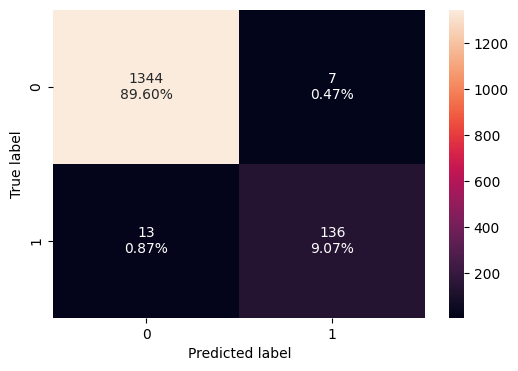

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

After Post pruning with ccp_alpha and highest Recall value, recall is 91% on the test data.

### Visualizing the Decision Tree

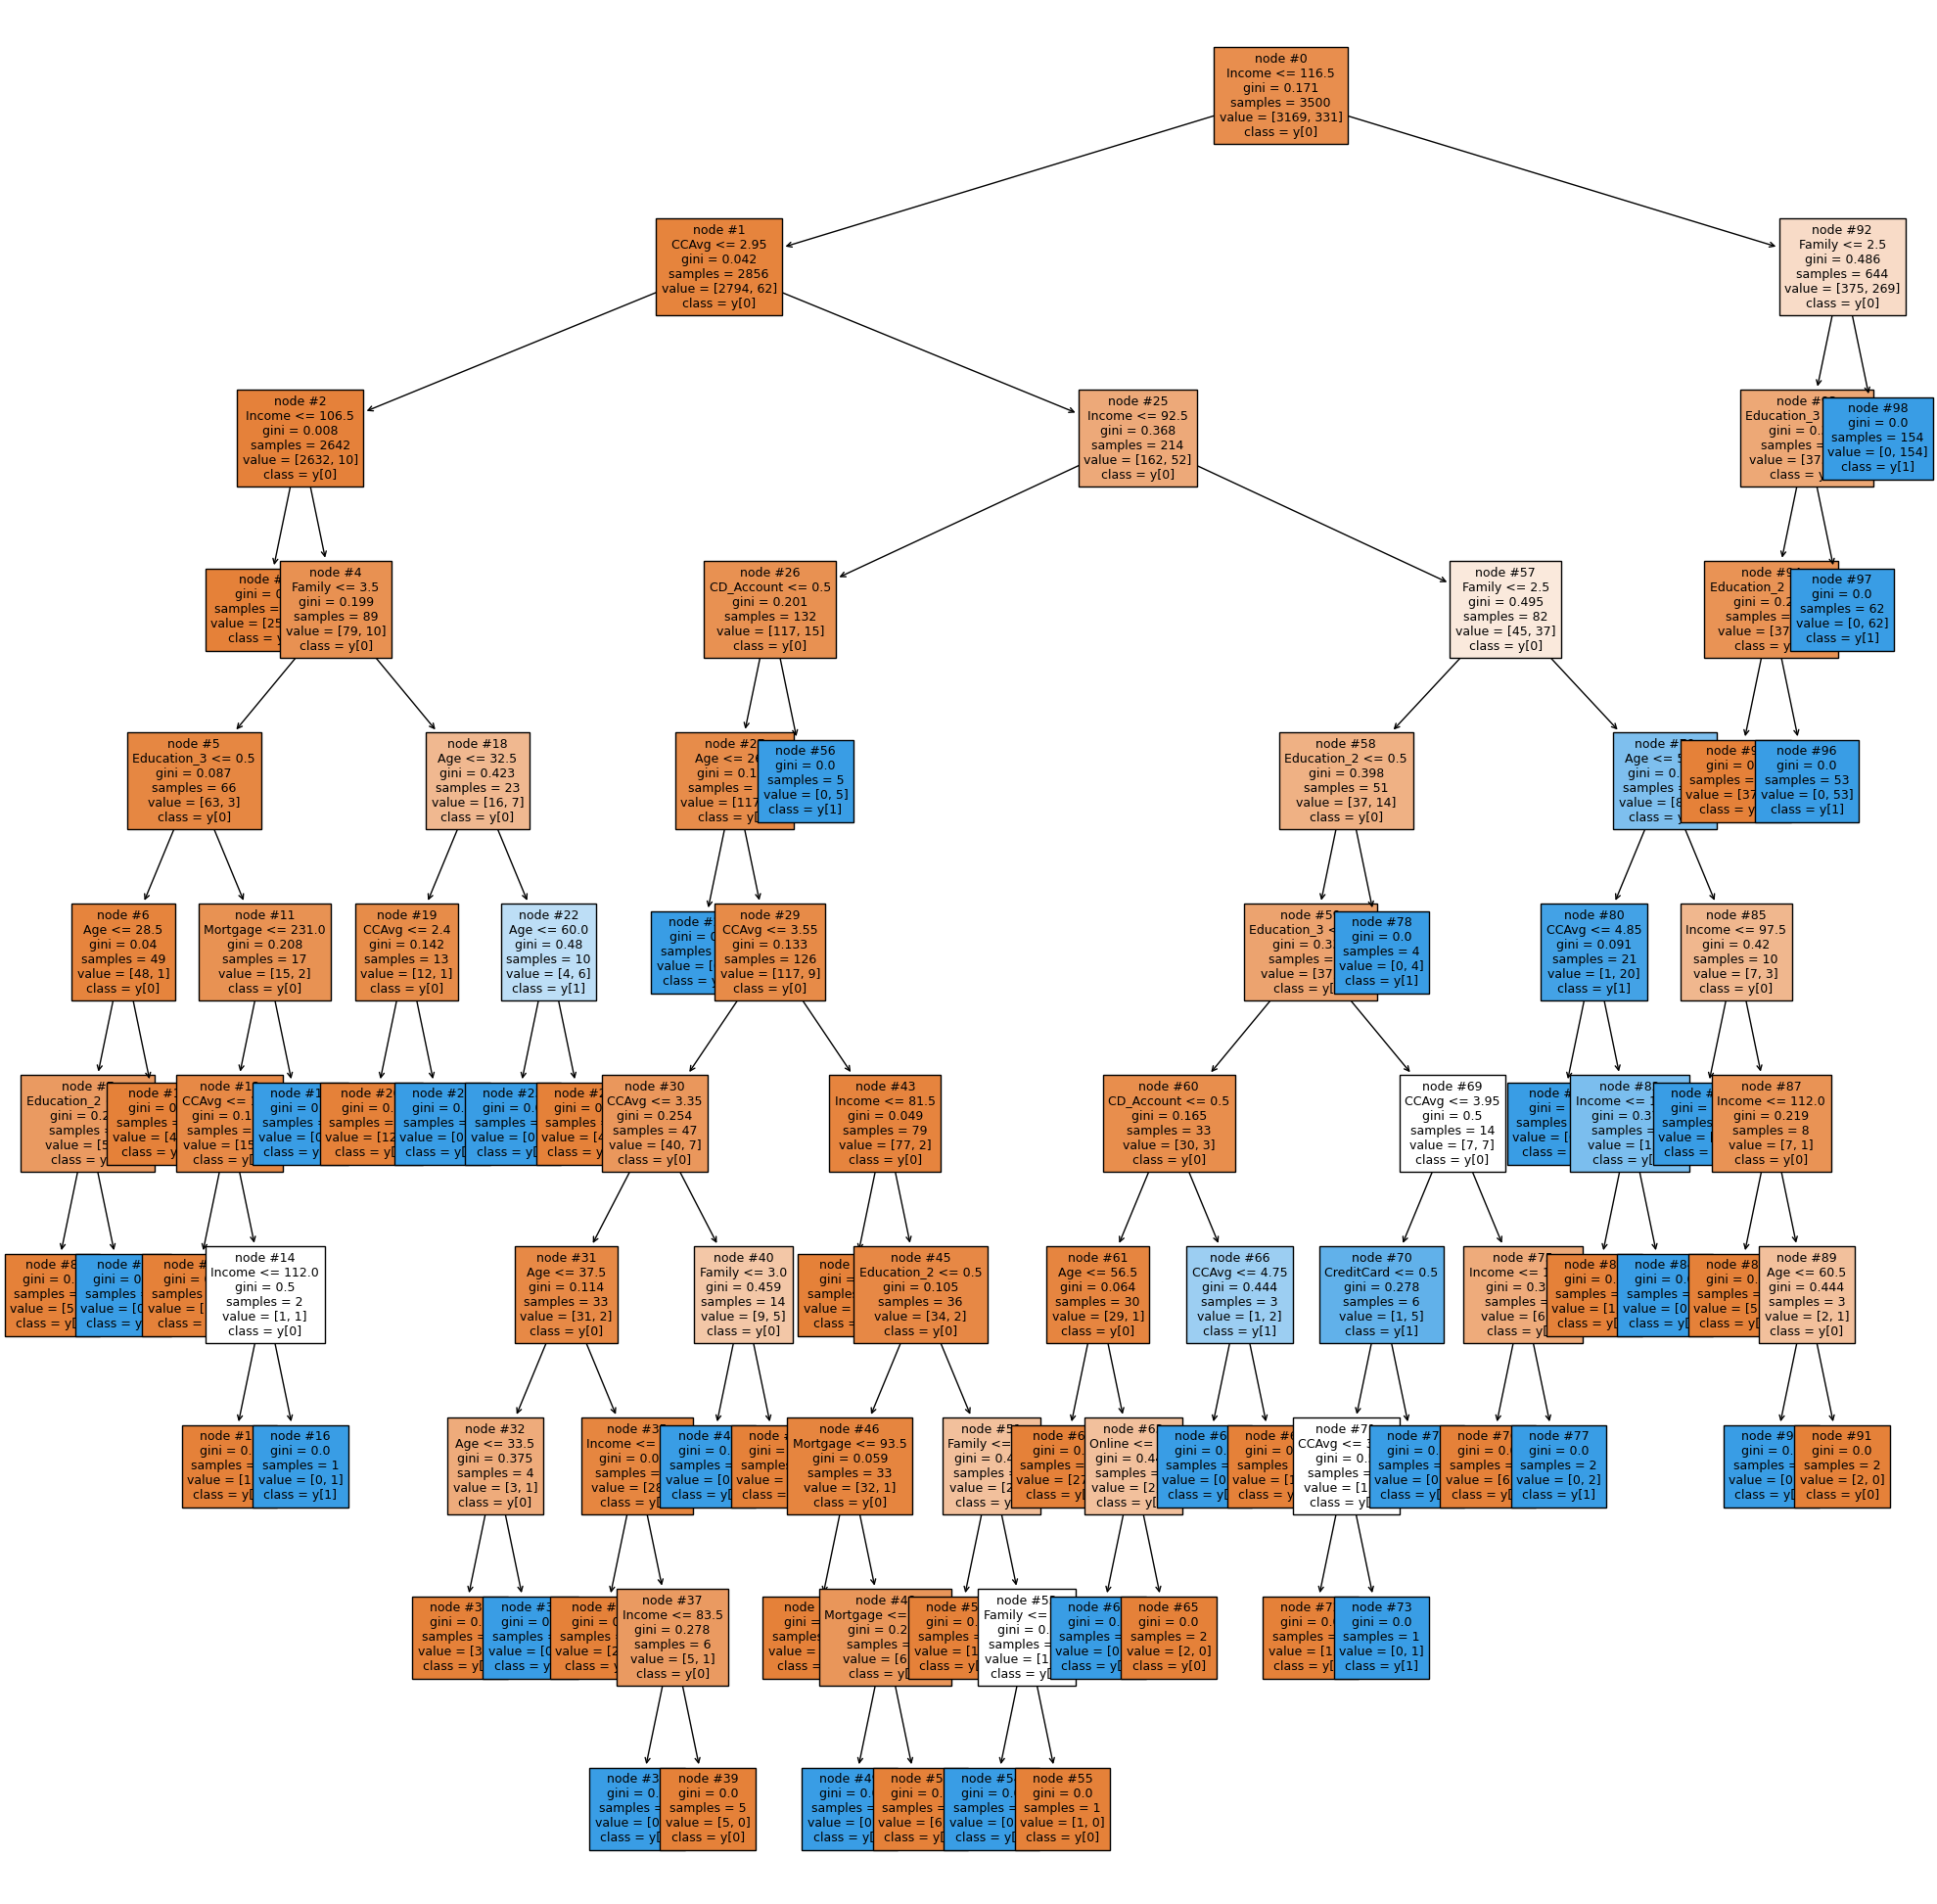

In [ ]:
plt.figure(figsize=(25, 25))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- weights: [43.00, 0.00] class: 0
|   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |--- Mortgage <= 231.00
|   |   |   |   |   |   |--- CCAvg <= 1.95
|   |   |   |   |   |   |   |--- weights: [14.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  1.95
|   |   |   |   |   |   |   |--- Income <= 112.00
|   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Income >  112.00
|   

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.315198
Family              0.259811
Education_2         0.166192
Education_3         0.144605
CCAvg               0.055184
Age                 0.032404
CD_Account          0.017273
Mortgage            0.005996
Online              0.002224
CreditCard          0.001112
Securities_Account  0.000000


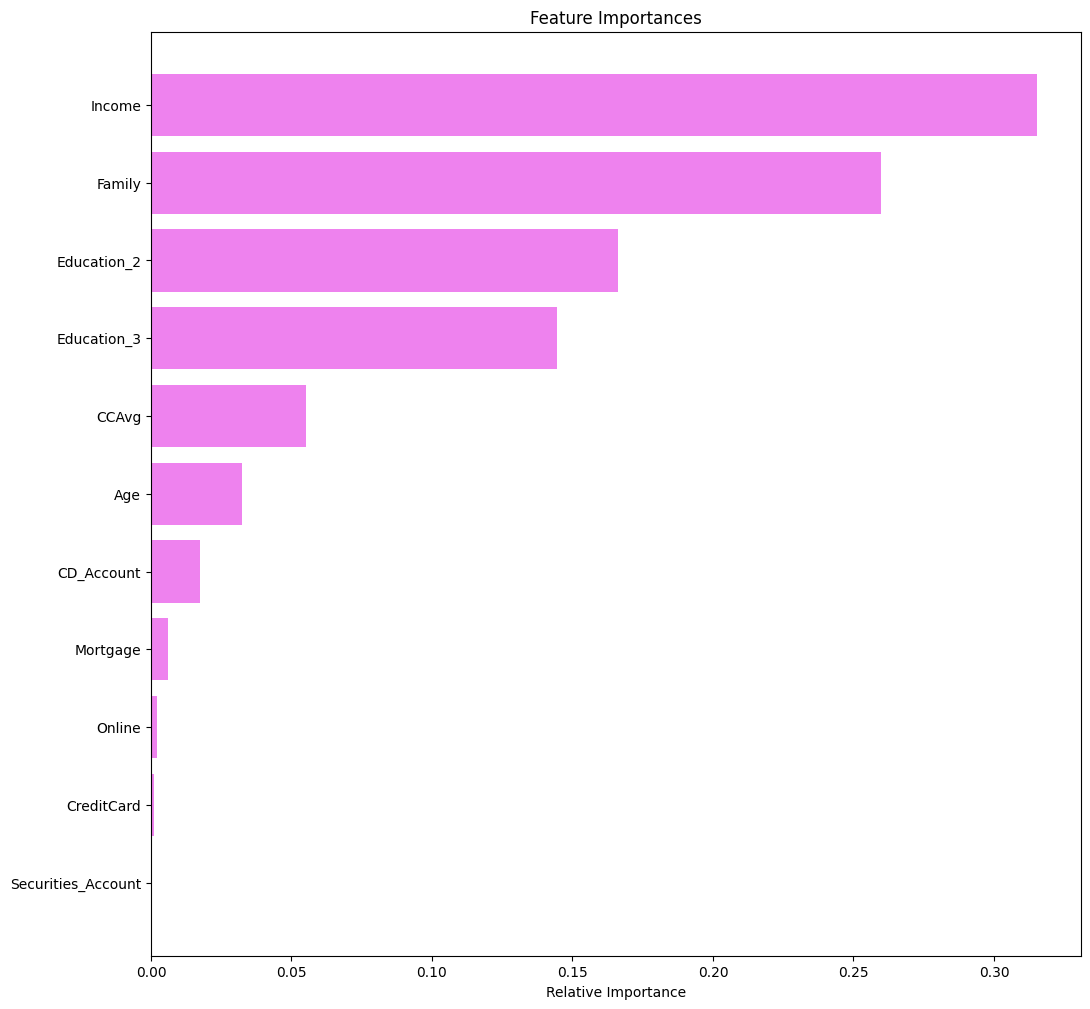

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Income, Family, Education_2,Education_3 are more important Variables in Predicting the Probable Customer accepting a loan as per Post Pruned Model

## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.960857,1.0
Recall,1.0,0.990937,1.0
Precision,1.0,0.709957,1.0
F1,1.0,0.827238,1.0


In [ ]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.986667,0.957333,0.986667
Recall,0.912752,0.953020,0.912752
Precision,0.951049,0.713568,0.951049
F1,0.931507,0.816092,0.931507


Analyzing the Performance of Models,


*   Post Pruned Model give the highest recall with 98.8% on train data and 93% on test data with ccp_alpha = 0.002
*   Pre Pruned Model has recall of 87% on train data and 78% on test data.

*   Feature Importance for Post Pruned Model


1.   Income              63% - Higher the income, higher the chances of customer taking Personal Loan
2.   Education_2(Graduation)         14% - Graduate Educated Customers have more chance of taking loan

3.   CCAvg               7% - Customers who have high spending on Credit Card per month are more likely to take Loan
4.   Education_3         7% - Advanced/Professional customers have more probability of taking loan
5. Family              6% - Customers with family size 3 or 4 are more likely to take loan







## Actionable Insights and Business Recommendations


**What** **recommedations would you suggest to the bank?**


*   Campaigns for Personal Loan should be targetted to Customers who have higher income.
*   Target Customers with Graduate and Advanced/Professional Education who have high probability of accepting loan

*   Customers who have Credit Cards and have higher monthly spending on the cards are more likely to take Loan.
*   Target Customers with Family size of 3 or 4, who have more probability to take loan





# Questions:

### What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

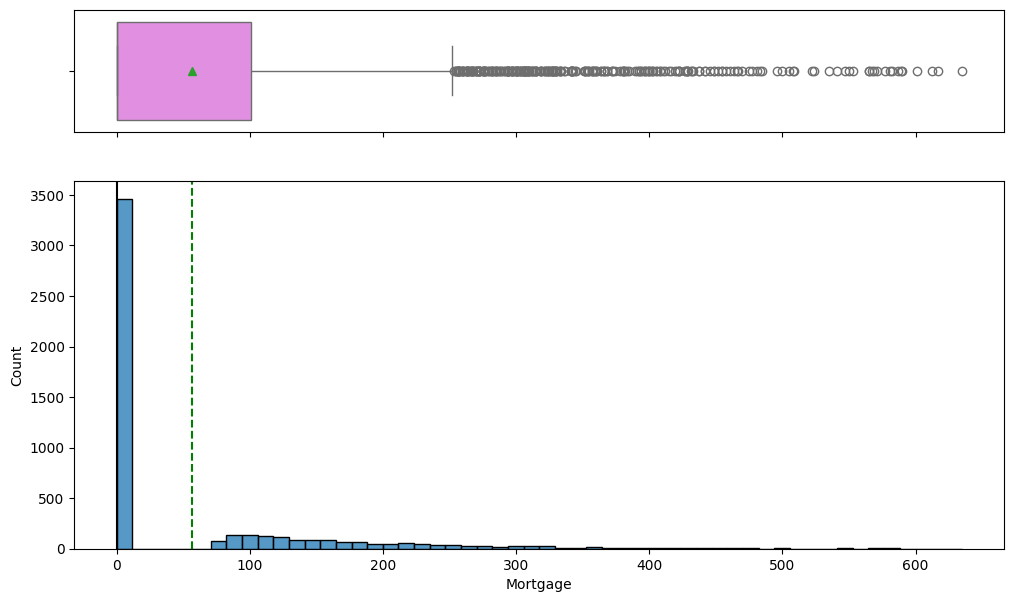

In [ ]:
histogram_boxplot(data, "Mortgage")

In [ ]:
data["Mortgage"].describe()

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

Answer : Mortgage variable distribution is highly Right skewed with many outliers.

50% of customers doenst have mortgage. Some customers have maximum mortgage of 635.

### How many customers have credit cards?

In [ ]:
data["CreditCard"].value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

Answer : From the data for Credit Card issued from other banks, there are 1470 customers with credit cards.

We wont be able to analyze number of Credit Card info from CCAvg  data since its Customer spending in dollars.

### What are the attributes that have a strong correlation with the target attribute (personal loan)?

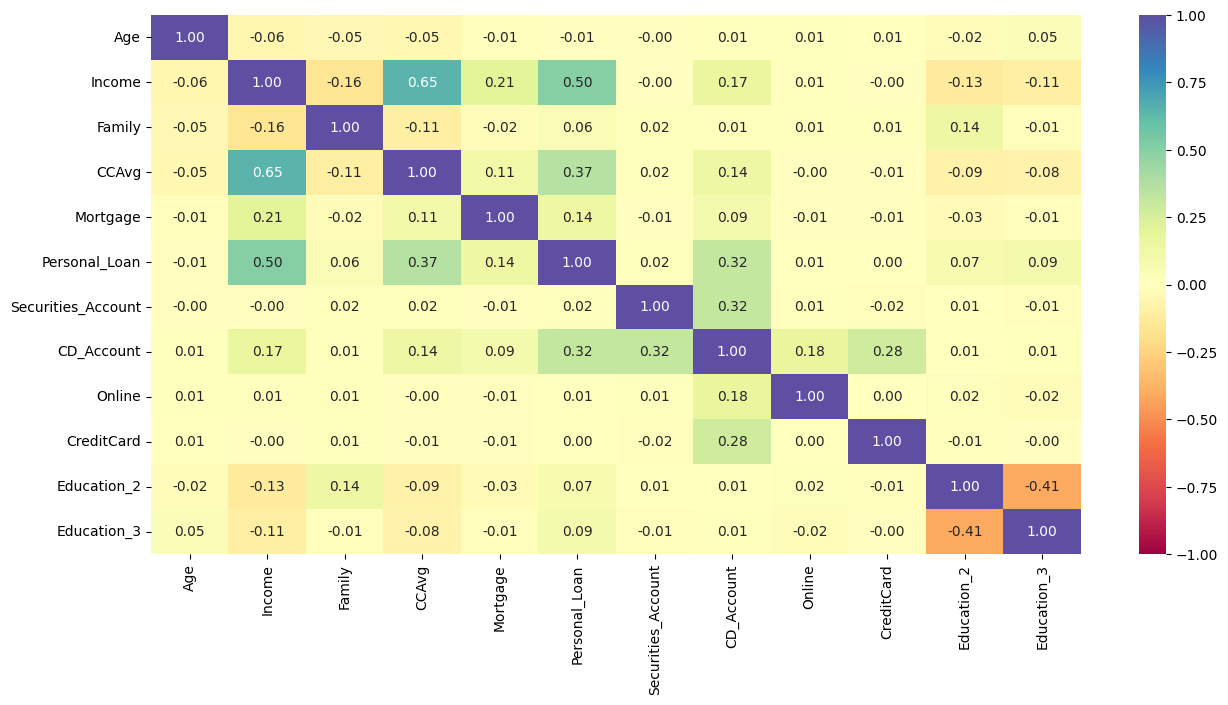

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Answer : From the heat map above, Personal Loan has strong Correlation with Income, CCAvg, CD_Account and Mortgage

### How does a customer's interest in purchasing a loan vary with their age?

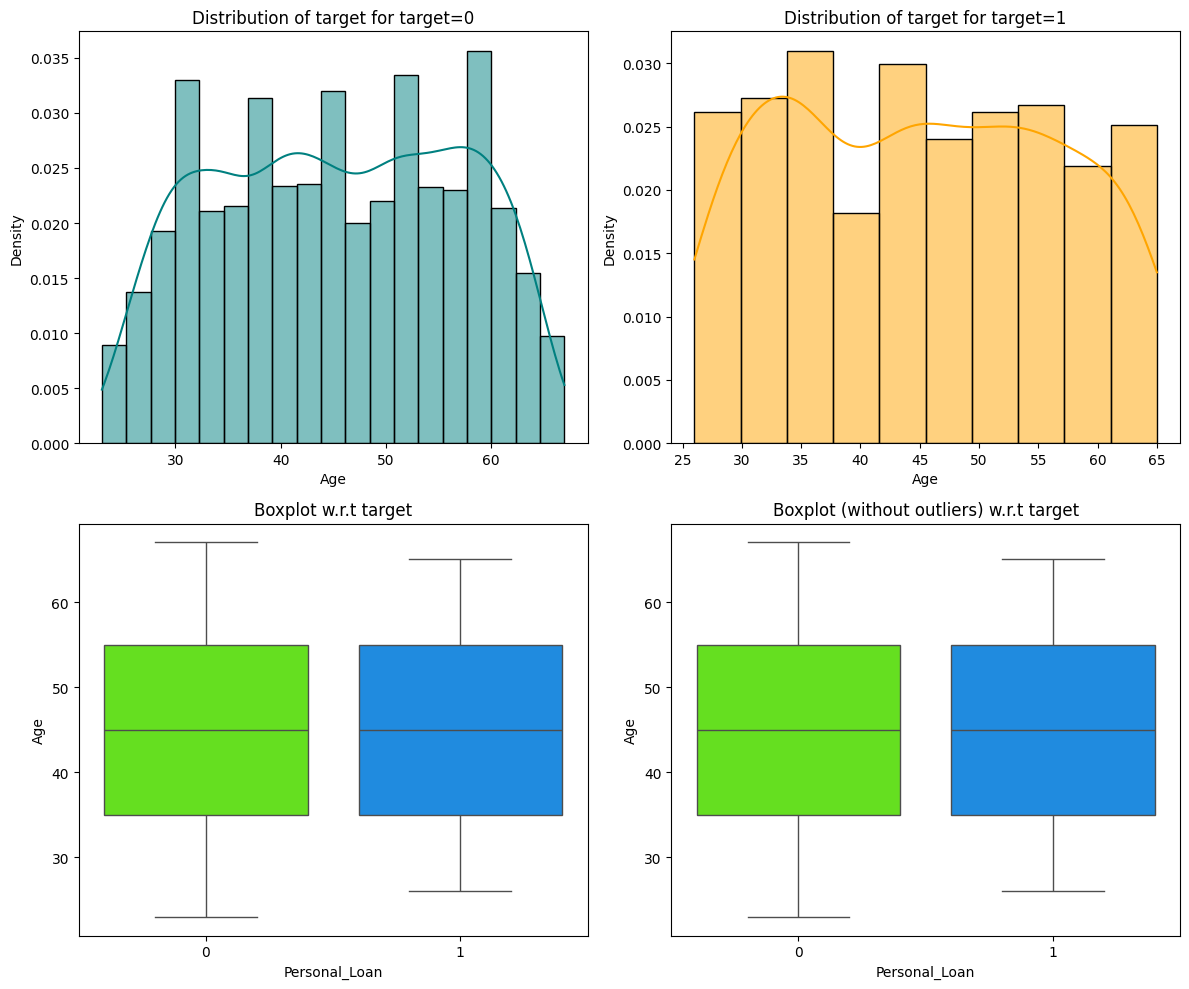

In [ ]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

Answer : Customers between 30 and 60 are taking more loans. Of this high density of customers taking loan is between age 30 and 38 years

___

### How does a customer's interest in purchasing a loan vary with their education?

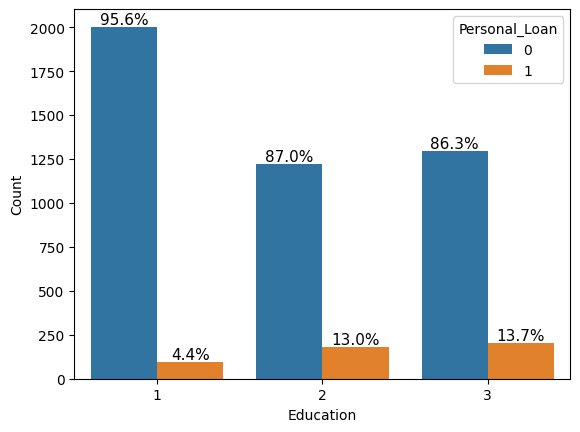

<Figure size 1200x800 with 0 Axes>

In [ ]:
ax3 = sns.countplot(x="Education", hue="Personal_Loan", data=Loan)
ax3.set(xlabel='Education', ylabel='Count')
percentage_above_bar_relative_to_xgroup(ax3)
plt.figure(figsize=(12, 8))
plt.show()

Answer : 13.7 % of Education Level 3 Customers,

13 % of Education Level 2 Customers and

4.4% of Education Level 1 Customers have Personal Loan

Data shows higher Education level Customers have higher Percentage  of Personal Loan